### Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Busca por entender Dataframe (Nulos e tipos de dados)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/EstudosColab/MKT.csv")
print(df)

     youtube  facebook  newspaper  sales
0      84.72     19.20      48.96  12.60
1     351.48     33.96      51.84  25.68
2     135.48     20.88      46.32  14.28
3     116.64      1.80      36.00  11.52
4     318.72     24.00       0.36  20.88
..       ...       ...        ...    ...
166    45.84      4.44      16.56   9.12
167   113.04      5.88       9.72  11.64
168   212.40     11.16       7.68  15.36
169   340.32     50.40      79.44  30.60
170   278.52     10.32      10.44  16.08

[171 rows x 4 columns]


In [4]:
print(df.shape)

(171, 4)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [6]:
print(df.describe())

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


### Buscar outlaiers

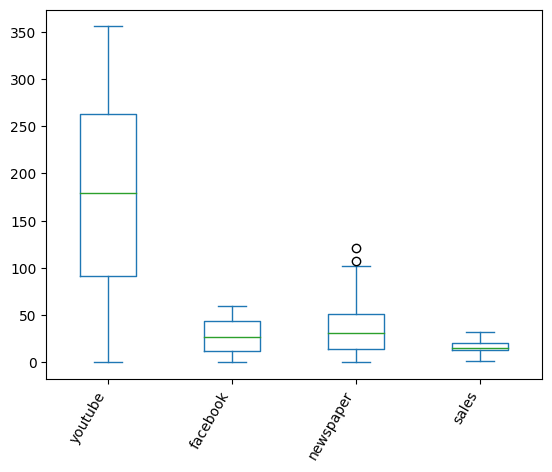

In [7]:
# outlairs - boxplot
df.plot.box()
plt.xticks(rotation=60, ha='right');

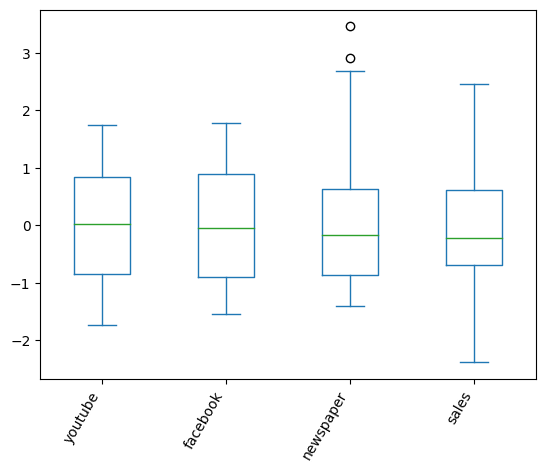

In [8]:
# outlairs- boxplot - agora com padronização
from sklearn.preprocessing import scale, minmax_scale, power_transform
df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

In [9]:
df.ash=df

# Função para calcular outleiar -
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)
is_outlier(df.ash)

<ipython-input-9-dd678b315daa>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ash=df


,youtube,facebook,newspaper,sales
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,True,False,False,False
...,...,...,...,...
166,False,False,False,False
167,False,False,False,False
168,True,False,False,False
169,True,False,False,False


In [10]:
#filtrando outliers - selecionando
df[df.apply(is_outlier).any(axis=1)]

,youtube,facebook,newspaper,sales
46,20.28,52.44,107.28,10.44
72,355.68,43.56,121.08,28.56


In [11]:
# drop os dois outlaiers
df = df.drop([46, 72])

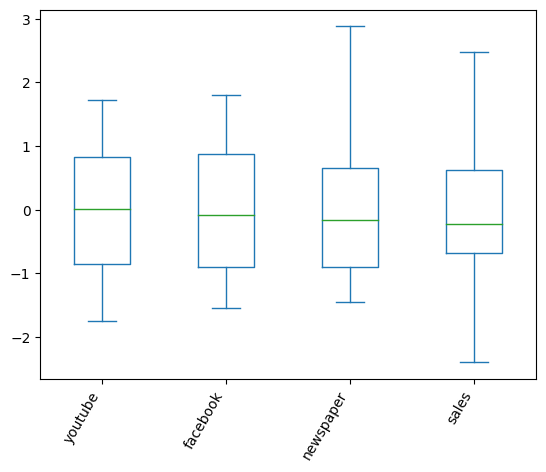

In [12]:
# outlairs- boxplot - agora com padronização
from sklearn.preprocessing import scale, minmax_scale, power_transform
df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

### Visualizar as relações entre variáveis

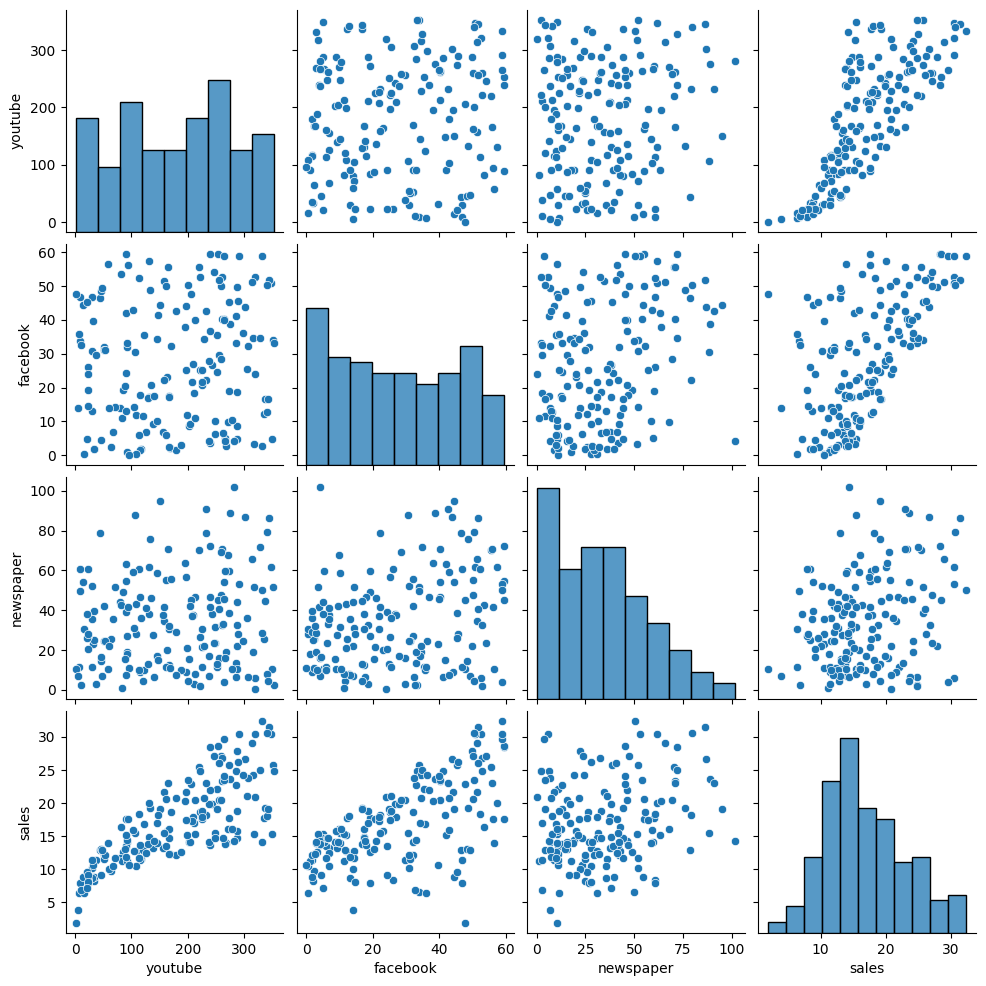

In [13]:
sns.pairplot(df)
plt.show()

### Calcular a matriz de correlação

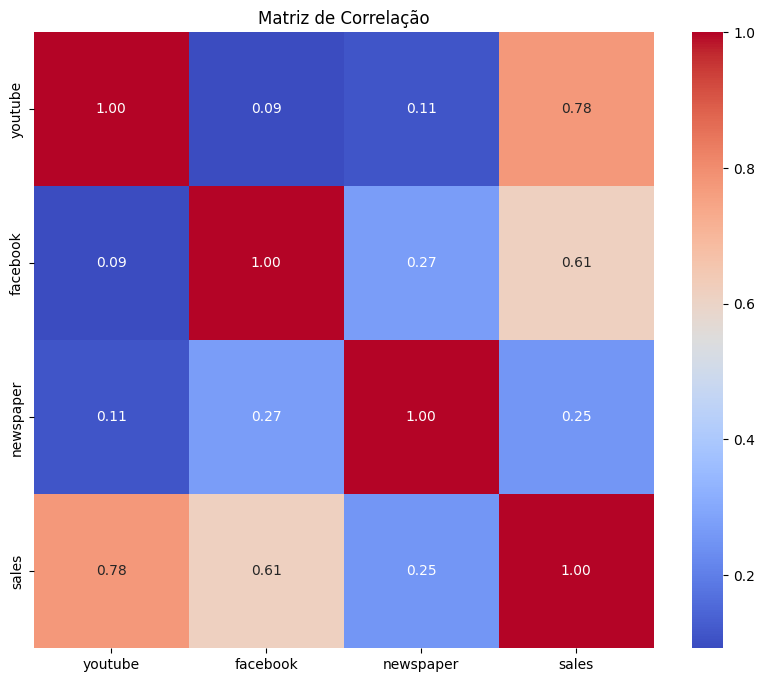

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

### Preparar dados para modelagem

In [16]:
X = df[['youtube', 'facebook', 'newspaper']]  # Features
y = df['sales']  # Target variable

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Treinar modelo - Regressão Linear

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Avaliar o modelo

In [18]:
# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MSE: 3.2447250061306216
R2 Score: 0.9019111289467798


### Interpretar os resultados
Um MSE de 3.2447 sugere um ajuste relativamente bom do modelo aos dados. Com um R² de 0.9019, seu modelo explica aproximadamente 90.19% da variabilidade presente nos dados de teste

### Visualizar as previsões

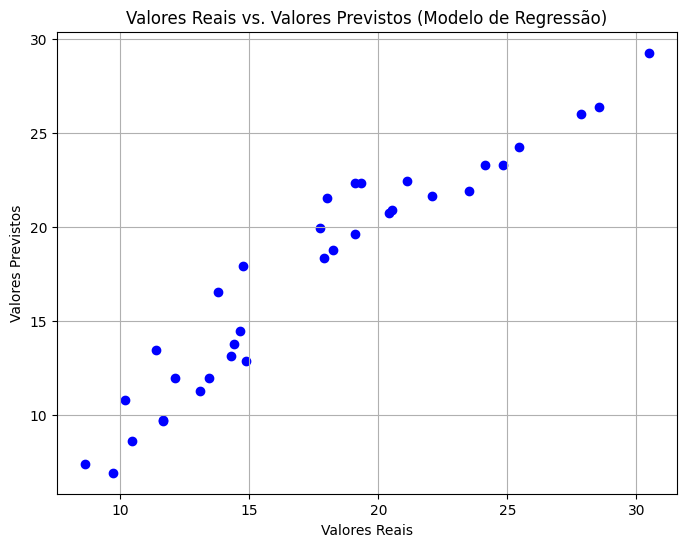

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (Modelo de Regressão)')
plt.grid(True)
plt.show()

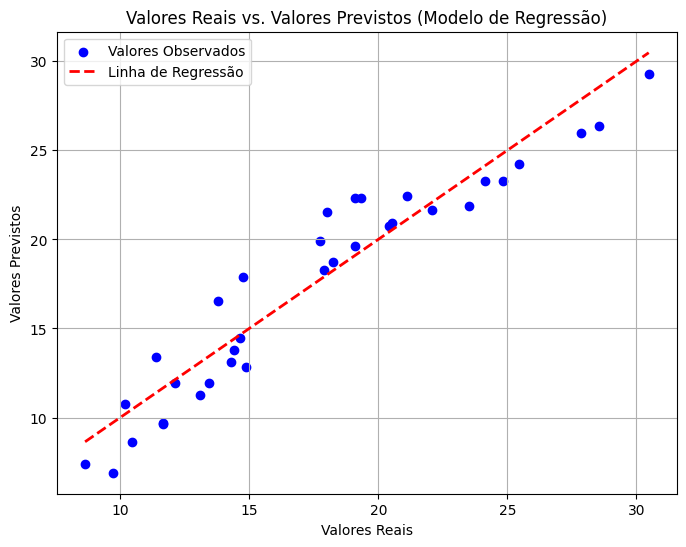

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Linha de Regressão')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (Modelo de Regressão)')
plt.legend()
plt.grid(True)
plt.show()

##Prevendo Sales


In [21]:
# Coeficientes da regressão
beta_0 = model.intercept_
beta_1, beta_2, beta_3 = model.coef_

In [22]:
# Valores aleatorios para youtube, facebook e newspaper
youtube_value = 100  # Exemplo
facebook_value = 200  # Exemplo
newspaper_value = 50  # Exemplo

In [23]:
# Calcular o valor de sales
sales_value = beta_0 + beta_1 * youtube_value + beta_2 * facebook_value + beta_3 * newspaper_value
sales_value_rounded = round(sales_value, 2)
sales_value_formatted = f"{sales_value_rounded} mil"
print("Valor aproximado de 'sales' para os valores especificados de 'youtube', 'facebook' e 'newspaper':", sales_value_formatted)

Valor aproximado de 'sales' para os valores especificados de 'youtube', 'facebook' e 'newspaper': 45.2 mil
